## Explore Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire, prepare

### Explore Item

In [2]:
#acquire data
sales = acquire.get_sales_data()

In [5]:
sales = prepare.prep_sales_data(sales)

In [6]:
sales.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,1,Tuesday


In [9]:
#Splitting the data - 70% to train 
train_size = .70

# find n, the number of rows in df
n = sales.shape[0]
test_start_index = round(train_size * n)

#splitting first 70% to train, remainder to test
train = sales[:test_start_index] # everything up (not including) to the test_start_index
test = sales[test_start_index:] # everything from the test_start_index to the end

train.shape, test.shape

((639100, 16), (273900, 16))

In [10]:
train.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,1,Tuesday


In [13]:
# split target to y (y-train)
y = train.sale_total
y.head(2)

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
Name: sale_total, dtype: float64

### Check distribution of target variable (total_sales)

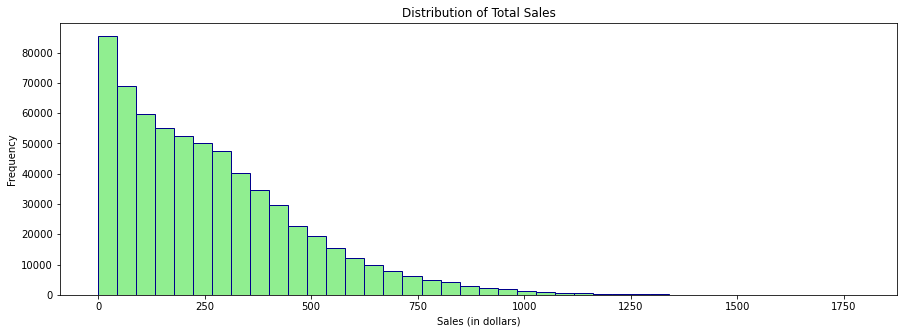

In [25]:
#look at distribution of our target variable
plt.figure(figsize=(15, 5))
y.plot.hist(bins = 40, color = 'lightgreen', edgecolor = 'darkblue')
plt.xlabel('Sales (in dollars)')
plt.title('Distribution of Total Sales')
plt.show()

#### Takeaways
- Majority of total sales below $250<br>
- right skewed

In [ ]:
### Explore Sales on Different Components of Time

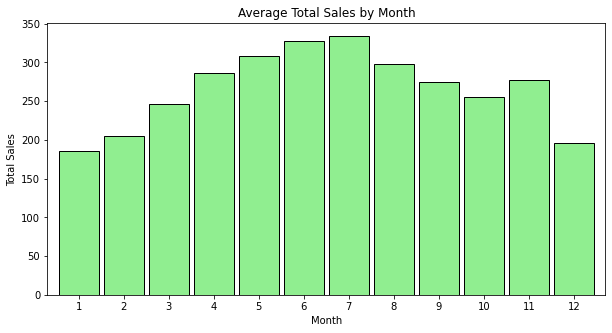

In [36]:
### Explore sale_amount by month
plt.figure(figsize=(10, 5))
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Total Sales')
plt.show()

# Takeaway:
- highest sales in May, June, July
- lower sales in Jan, Feb, Dec

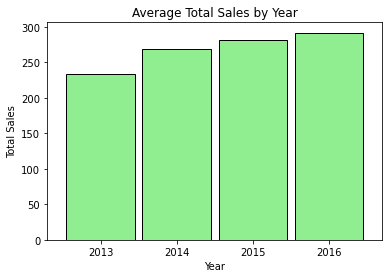

In [30]:
### Explore sale_amount by year
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Year', xlabel='Year', ylabel='Total Sales')
plt.show()

#### Takeaways:
- sales increasing each year

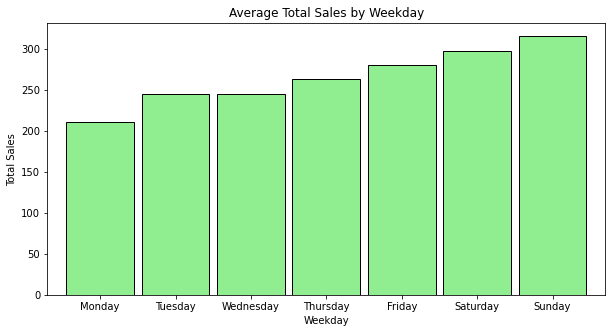

In [40]:
### Explore sale_amount by weekday
plt.figure(figsize=(10, 5))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales')
plt.show()

#### Takeaways:
- lowest sales day is Monday
- sales higher on Friday, Saturday, Sunday

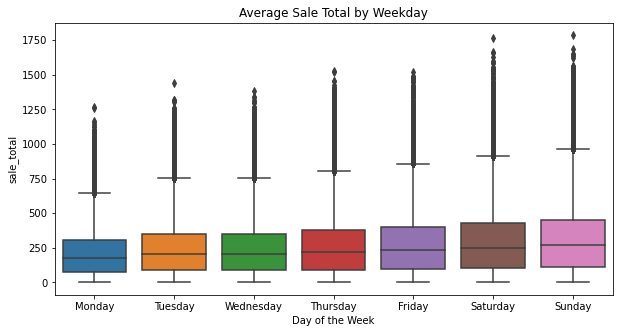

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = train, x = 'day_of_week', y = 'sale_total', order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
plt.title('Average Sale Total by Weekday')
plt.xlabel('Day of the Week')
plt.show()

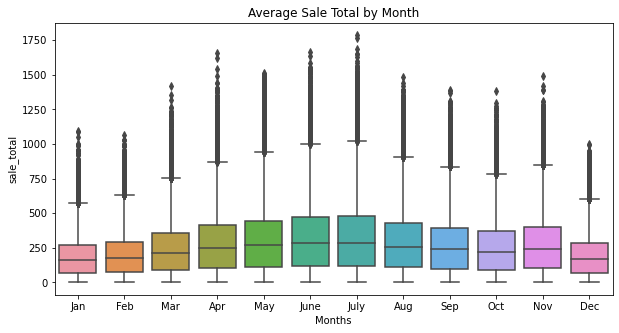

In [66]:
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = train, x = 'month', y = 'sale_total')
plt.title('Average Sale Total by Month')
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.show()

### Visualize target over time

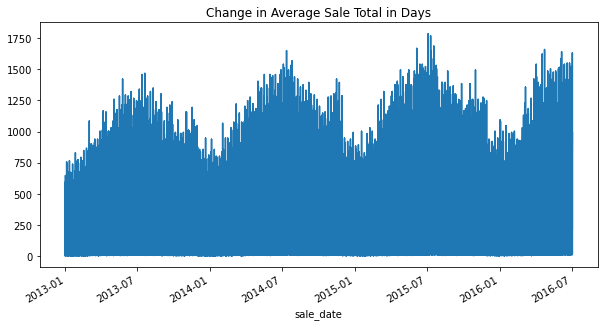

In [70]:
# Visualize target over time - days
plt.figure(figsize=(10, 5))
plt.title('Change in Average Sale Total in Days')
y.plot()
plt.show()

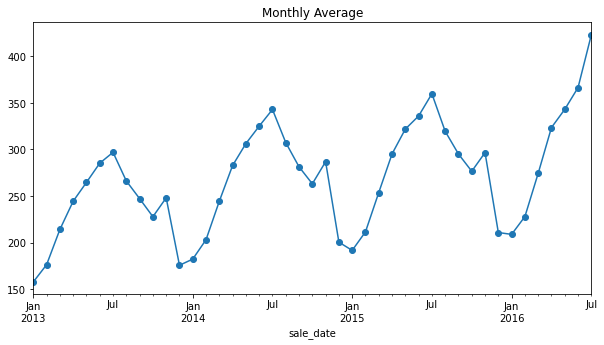

In [79]:
# Visualize target over time - months
plt.figure(figsize=(10, 5))
plt.title('Change in Average Sale Total in Months')
y.resample('M').mean().plot(title='Monthly Average', marker = 'o')
plt.show()

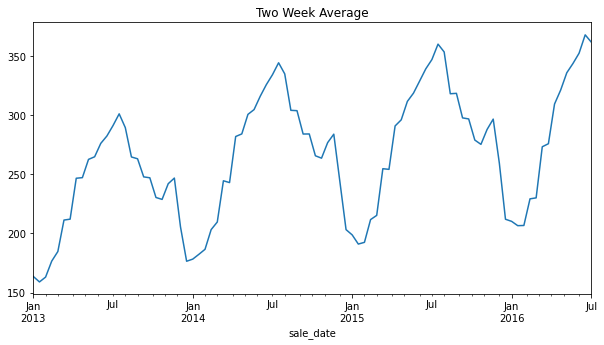

In [83]:
# Visualize target over time - weeks
plt.figure(figsize=(10, 5))
plt.title('Change in Two Week Average Sale Total')
y.resample('2W').mean().plot(title='Two Week Average')
plt.show()

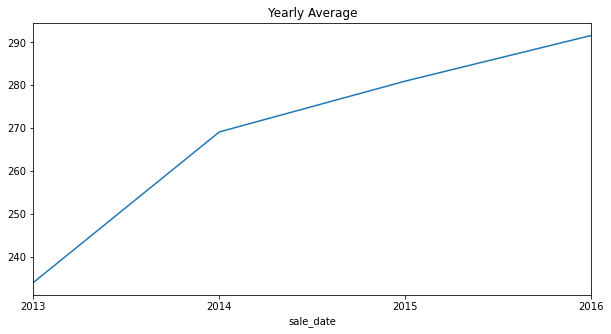

In [82]:
# Visualize target over time - years
plt.figure(figsize=(10, 5))
plt.title('Change in Average Sale Total by Years')
y.resample('Y').mean().plot(title='Yearly Average')
plt.show()

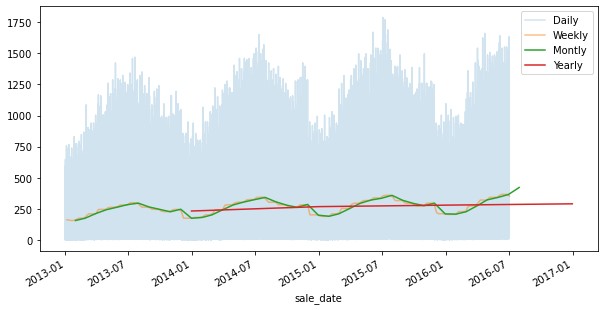

In [85]:
# Combined Visualization
plt.figure(figsize=(10, 5))
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

### Calculate Moving Averages

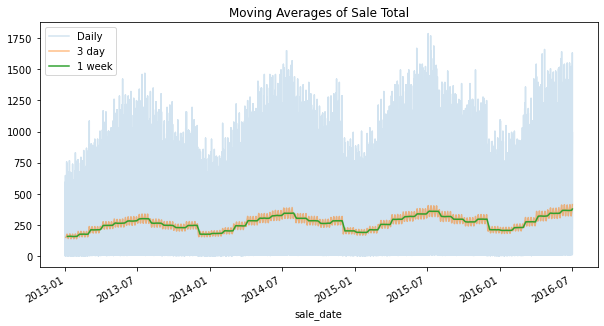

In [89]:
# Use .rolling.mean to Calculate Moving Averages by  day, 3-day, week
plt.figure(figsize=(10, 5))
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.title('Moving Averages of Sale Total')
plt.legend()
plt.show()

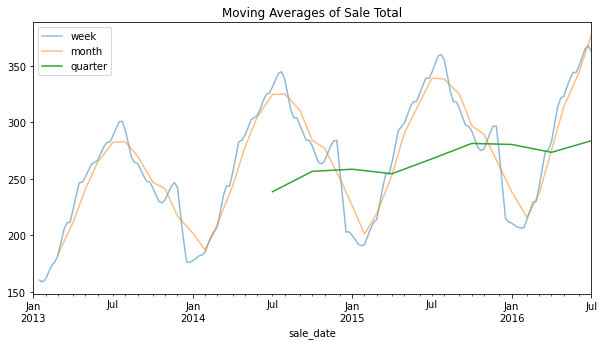

In [91]:
# Use .rolling.mean to Calculate Moving Averages by  week, month, quarter
plt.figure(figsize=(10, 5))
y.resample('W').mean().rolling(3).mean().plot(alpha=.5, label='week')
y.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='month')
y.resample('3M').mean().rolling(7).mean().plot(alpha=8, label='quarter')
plt.title('Moving Averages of Sale Total')
plt.legend()
plt.show()

### Visualize Change Over Time

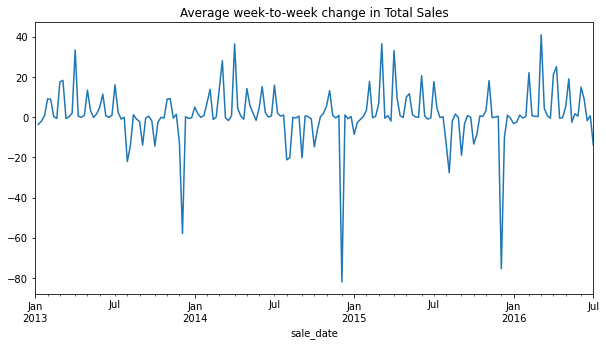

In [95]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('W').mean().diff().plot(title='Average week-to-week change in Total Sales')
plt.show()

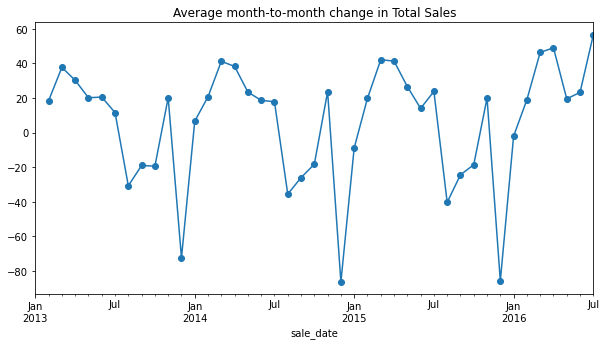

In [98]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('M').mean().diff().plot(title='Average month-to-month change in Total Sales', marker = 'o')
plt.show()

### Takeaways:
- last week of the year, sales really drop
- big decrease in sales in December
- big increase jan through peak in March

### Seasonal Visualizations

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

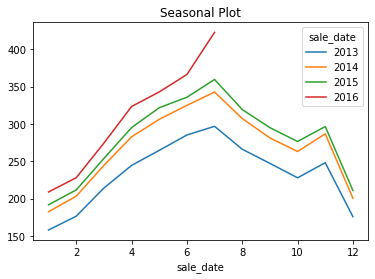

In [99]:
# use .groupby and .unstack (turns an index level into columns) to plot multiple years and compare seasons
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

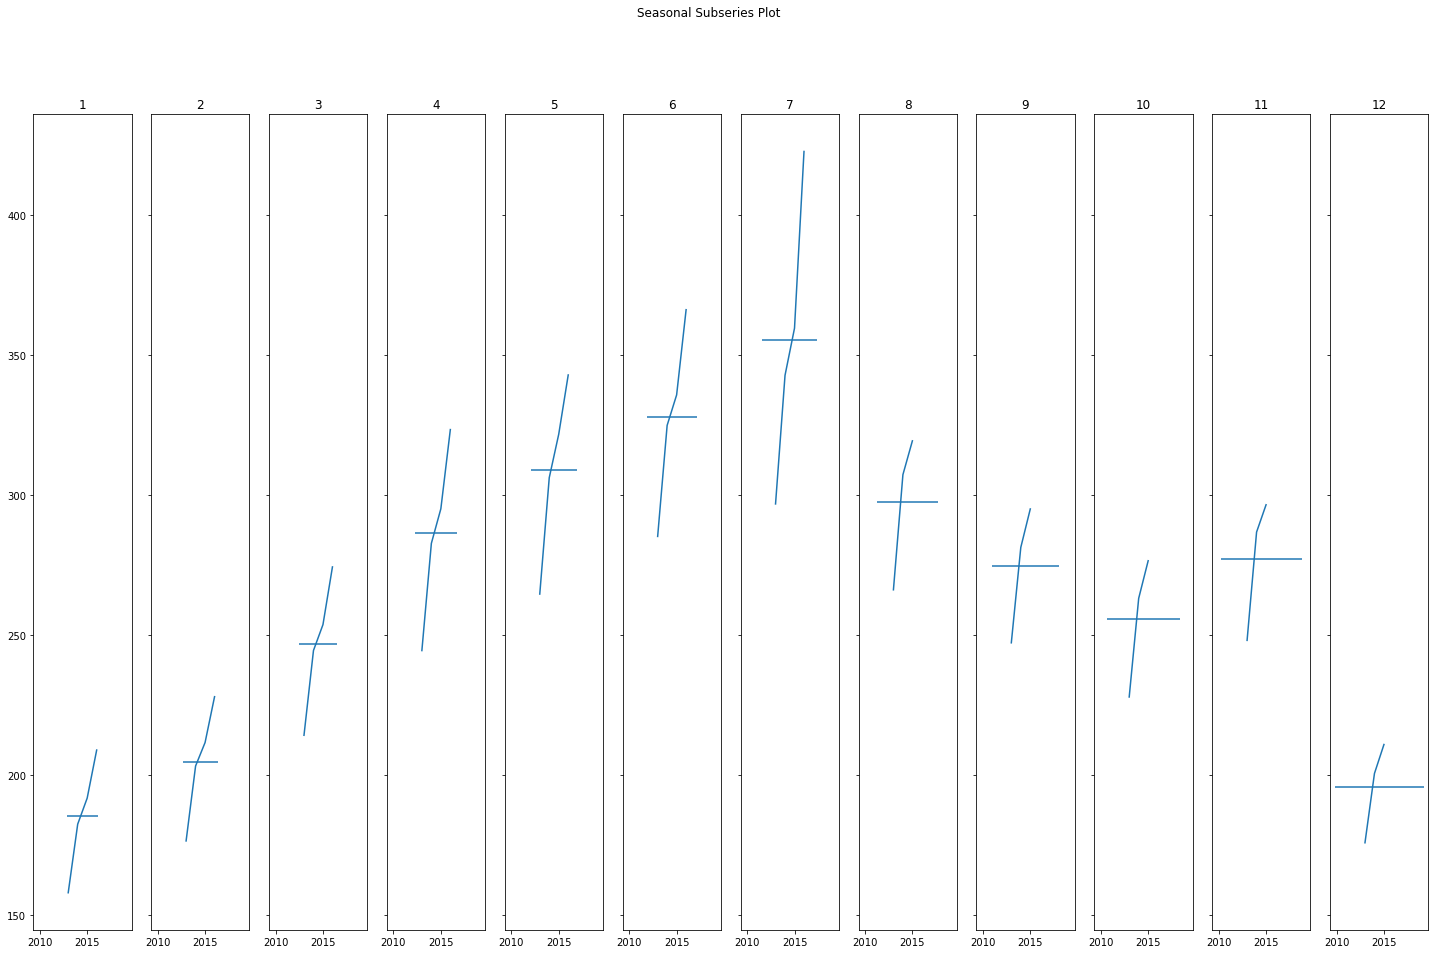

In [107]:
#= plot by season/year

table = y.groupby([y.index.year, y.index.month]).mean().unstack()
plt.rc('figure', figsize=(25, 15))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
plt.show()

### Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Text(0.5, 1.0, 'Lag plot with lag=1 day')

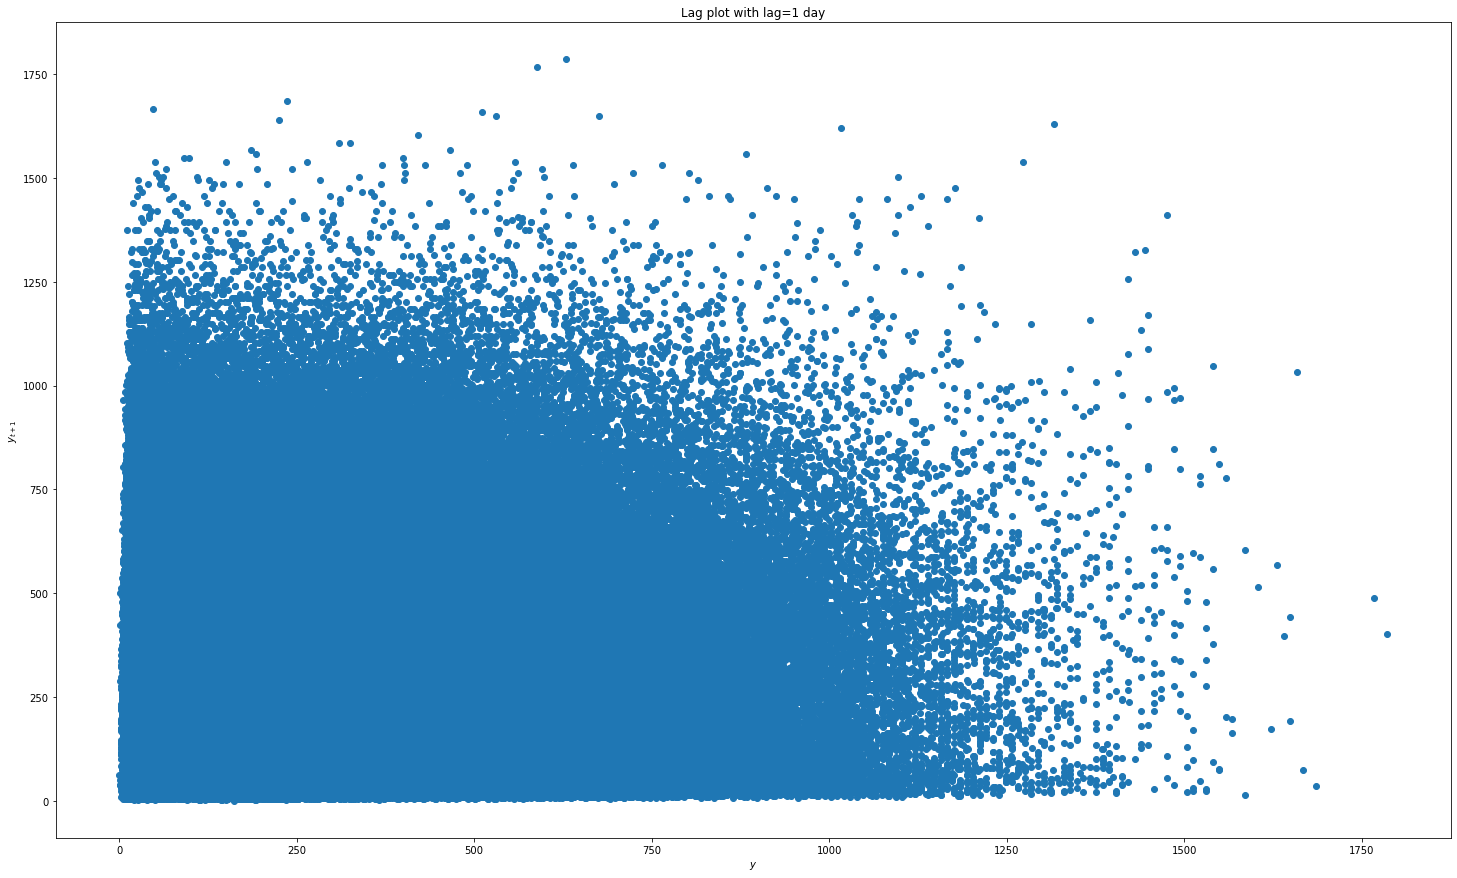

In [109]:
# lag equals 1. day
plt.rc('figure', figsize=(25, 15))    #rc = run commands, control several settings in one command
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 day')

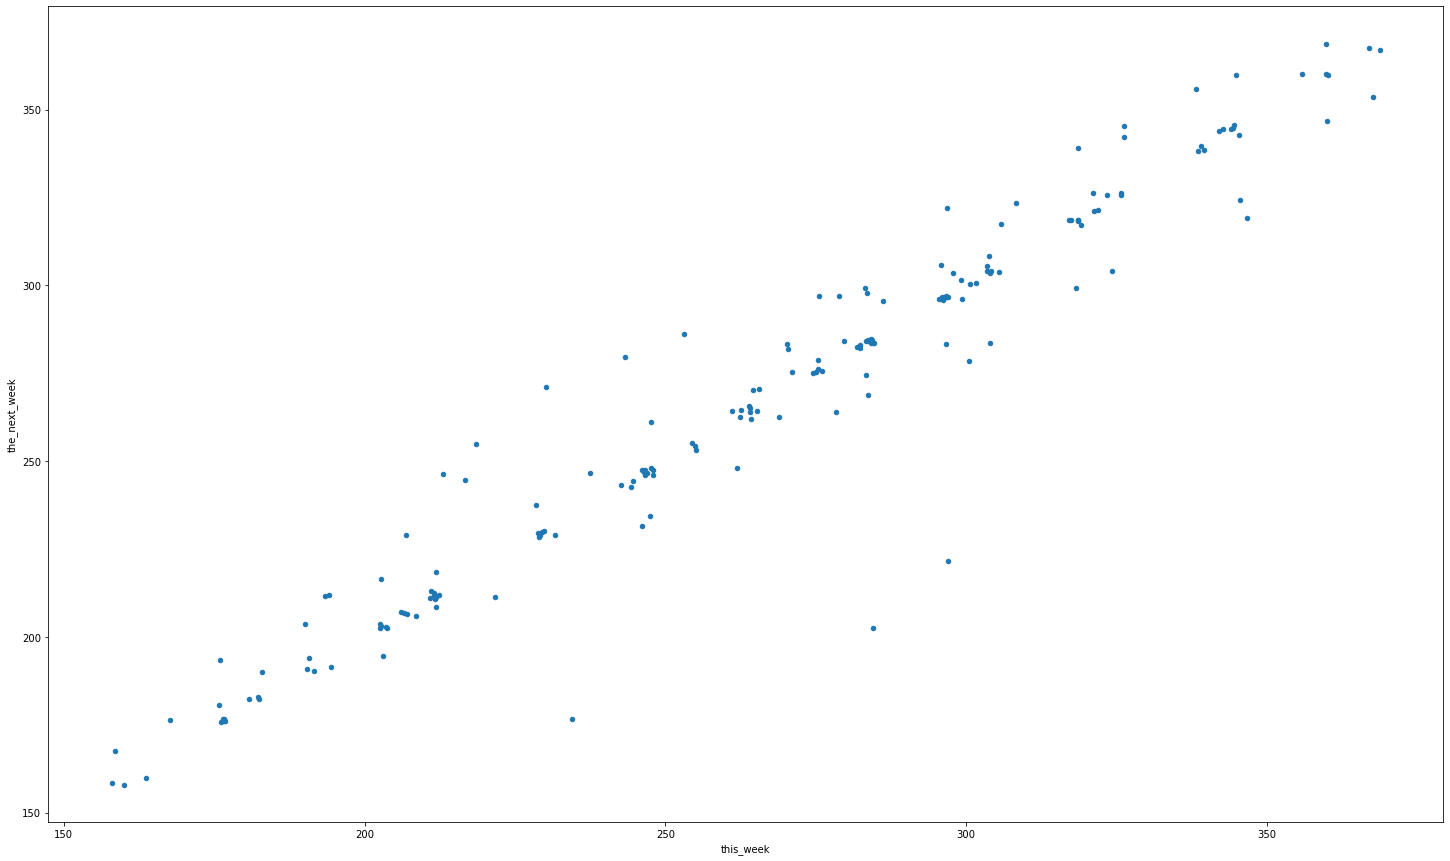

In [112]:
# lag = 1 week
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_total.shift(-1)
weekly = weekly.rename(columns={'sale_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly
plt.show()

### Autocorrelation Plot

##### Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

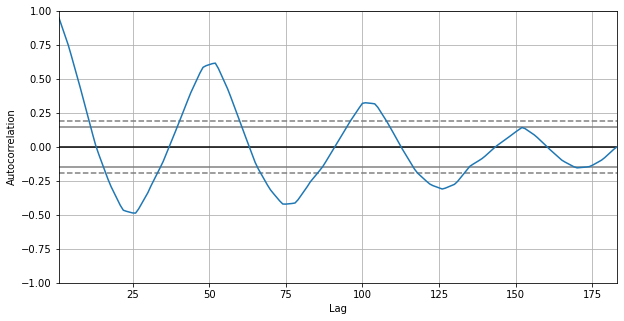

In [120]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.sale_total.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

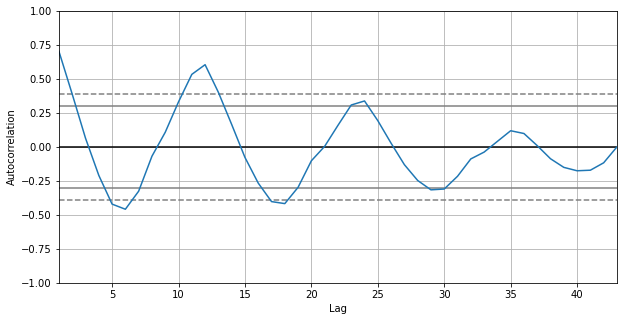

In [121]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.sale_total.resample('M').mean())

### Seasonal Decomposition

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

In [122]:
y = train.sale_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.817427,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.420498,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.661680,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.653889,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

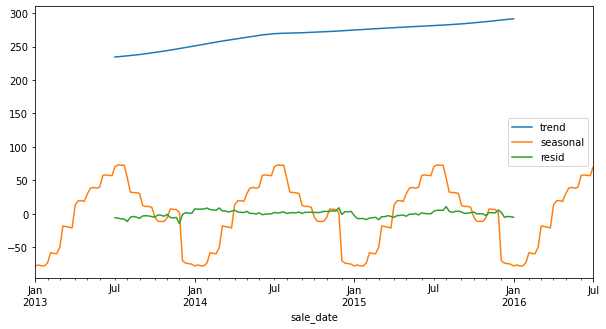

In [123]:
plt.rc('figure', figsize=(10, 5))  
decomposition.iloc[:, 1:].plot()

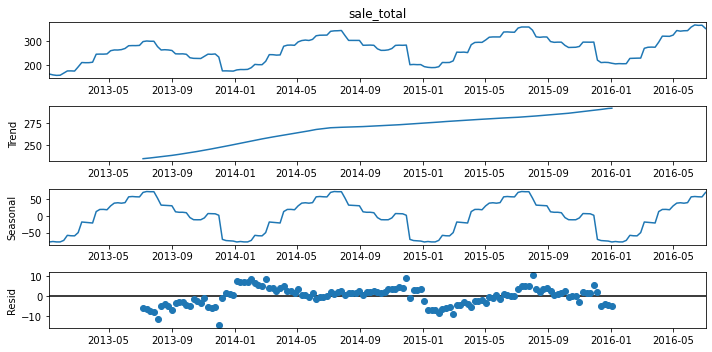

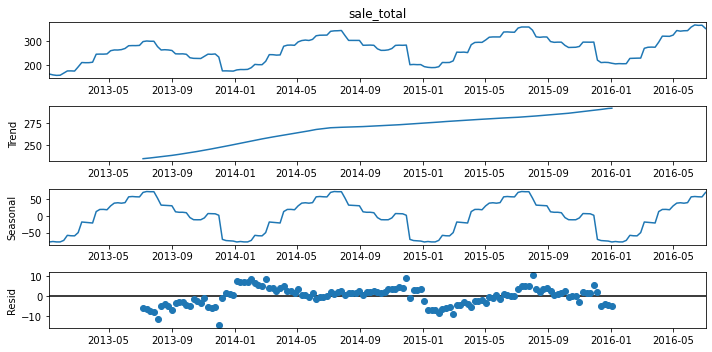

In [124]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

### Categories Over Time

In [127]:
# plot to see how binned sale totals change over time

train = train.resample('D').mean()
# create a categorical feature
train['sale_total_bin'] = pd.qcut(train.sale_total, 3, labels=['low', 'avg', 'high'])
train.groupby('sale_total_bin').mean()

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sale_total,month
sale_total_bin,,,,,,,,,,
low,36.404993,456092.714286,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,195.743931,5.126464
avg,49.054831,456213.086854,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.746919,6.615023
high,62.880920,456363.897981,5.500446,78224.808075,25.499319,5.160884,2.384536e+11,2.384536e+11,338.110364,6.549296


Text(0, 0.5, '% of days in the month')

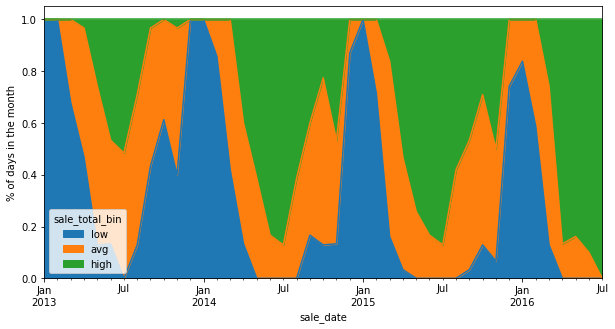

In [132]:
#plotting the change
(train.groupby('sale_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


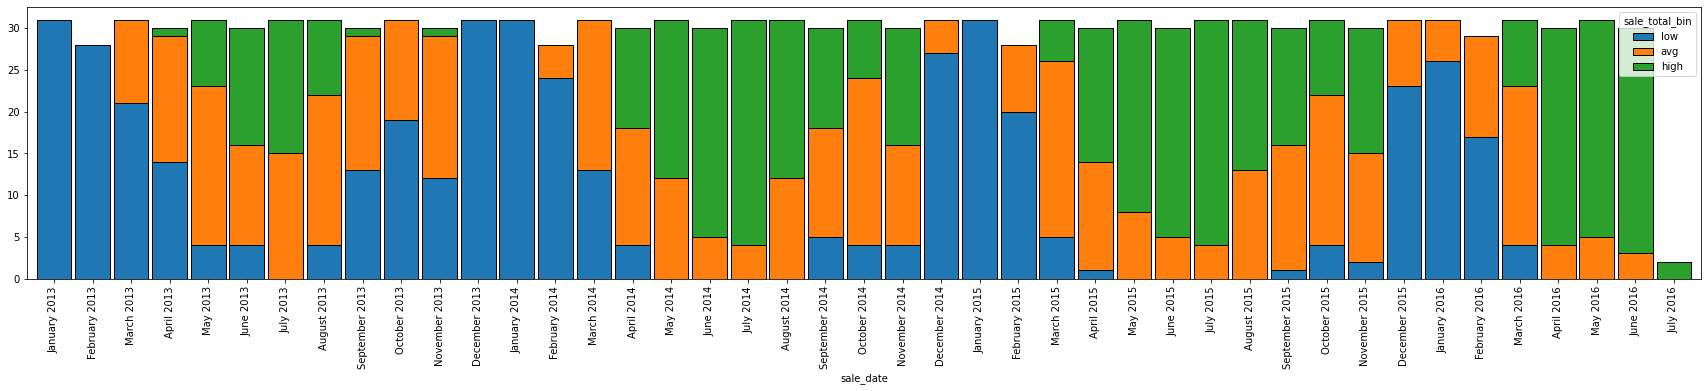

In [140]:
# plot same in bar plot form 

plt.rc('figure', figsize=(30, 5))  

ax = (train
 .groupby('sale_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B %Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

# Explore OPS

In [4]:
ops = acquire.get_ops()
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
ops = prepare.datetime(ops, 'Date')
ops.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
